# Load and plot dataset

X shape:  (100, 2)
y shape:  (100,)


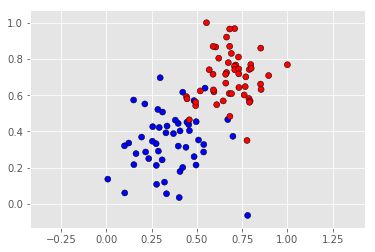

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

plt.style.use('ggplot')
np.random.seed(42)

df = pd.read_csv("data/perceptron_training_data.csv", header=None)
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
colors = ['red', 'blue']

print("X shape: ", X.shape)
print("y shape: ", y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(colors), edgecolors='k')
plt.axis('equal')
plt.show()

# Define functions for perceptron training

In [2]:
# Set fixed random seed
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

# Plot equation based on optimized weight & bias from perceptron

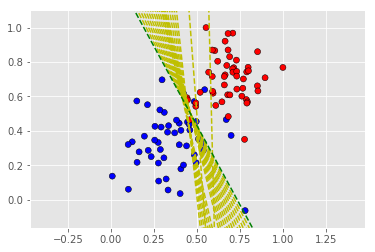

In [3]:
# Plot a line from slope and intercept
def abline(slope, intercept, pattern):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, pattern)

boundary_lines = trainPerceptronAlgorithm(X, y)

counter = 1
for line in boundary_lines:
    slope, intercept = line[0], line[1]
    if len(boundary_lines) == counter:
        abline(slope, intercept, 'g--') # last line
    else:
        abline(slope, intercept, 'y--') # Intermediatte line
    counter = counter + 1
    
plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(colors), edgecolors='k')
plt.axis('equal')
plt.xlim((X[:,0].min() - 0.1, X[:,0].max() + 0.1))
plt.ylim((X[:,1].min() - 0.1, X[:,1].max() + 0.1))
plt.show()